# import libary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
from sklearn.utils import resample

# Pre-Processing Data

In [3]:
df0 = pd.read_csv('/kaggle/input/datasetv5/PORT6000.csv', header=None)
df1 = pd.read_csv('/kaggle/input/datasetv5/PORT6001.csv', header=None)
df3 = pd.read_csv('/kaggle/input/datasetv5/PORT6003.csv', header=None)
df0.columns = ['time', 'date', 
              'Water Loss Ratio1','soil moisture1','water Level Ratio1',
              'Water Loss Ratio2','soil moisture2','water Level Ratio2',
              'Water Loss Ratio3','soil moisture3','water Level Ratio3',
             'temperature1','humidity1','Lighting1',
             'temperature2','humidity2','Lighting2',
             'temperature3','humidity3','Lighting3']
df1.columns = ['time', 'date', 
              'Water Loss Ratio1','soil moisture1','water Level Ratio1',
              'Water Loss Ratio2','soil moisture2','water Level Ratio2',
              'Water Loss Ratio3','soil moisture3','water Level Ratio3',
             'temperature1','humidity1','Lighting1',
             'temperature2','humidity2','Lighting2',
             'temperature3','humidity3','Lighting3']
df3.columns = ['time', 'date', 
              'Water Loss Ratio1','soil moisture1','water Level Ratio1',
              'Water Loss Ratio2','soil moisture2','water Level Ratio2',
              'Water Loss Ratio3','soil moisture3','water Level Ratio3',
             'temperature1','humidity1','Lighting1',
             'temperature2','humidity2','Lighting2',
             'temperature3','humidity3','Lighting3']
df0.to_csv('file_with_headers0.csv', index=False, header=True)
df1.to_csv('file_with_headers1.csv', index=False, header=True)
df3.to_csv('file_with_headers3.csv', index=False, header=True)


In [4]:
label0 = 'Strawberry'
df0['type'] = label0
label1 = 'Pepper'
df1['type'] = label1
label3 = 'tomatoes'
df3['type'] = label3


In [5]:
df0.to_csv('Strawberry.csv', index=False)
df1.to_csv('Pepper.csv', index=False)
df3.to_csv('tomatoes.csv', index=False)


In [6]:
Strawberry = pd.read_csv('/kaggle/working/Strawberry.csv')
Pepper = pd.read_csv('/kaggle/working/Pepper.csv')
tomatoes = pd.read_csv('/kaggle/working/tomatoes.csv')

merged_df = pd.concat([Strawberry, Pepper, tomatoes])

merged_df.to_csv('merged-data.csv', index=False)

In [7]:
data=pd.read_csv("/kaggle/working/merged-data.csv")


In [8]:
data['Water Loss Ratio average'] = data[['Water Loss Ratio1', 'Water Loss Ratio2','Water Loss Ratio3']].mean(axis=1)
data['soil moisture average'] = data[['soil moisture1', 'soil moisture2','soil moisture3']].mean(axis=1)
data['Water Level Ratio average'] = data[['water Level Ratio1', 'water Level Ratio2','water Level Ratio3']].mean(axis=1)
data['Temperature average'] = data[['temperature1', 'temperature2','temperature3']].mean(axis=1)
data['Humidity average'] = data[['humidity1', 'humidity2','humidity3']].mean(axis=1)
data['Luminosity average'] = data[['Lighting1', 'Lighting2','Lighting3']].mean(axis=1)


data = data.drop(columns=['Water Loss Ratio1', 'Water Loss Ratio2','Water Loss Ratio3',
                      'soil moisture1', 'soil moisture2','soil moisture3',
                      'water Level Ratio1', 'water Level Ratio2','water Level Ratio3',
                      'temperature1', 'temperature2','temperature3',
                      'humidity1', 'humidity2','humidity3',
                      'Lighting1', 'Lighting2','Lighting3'
                      
                     ])

# write the modified dataframe to a new CSV file
data.to_csv('dataset.csv', index=False)

In [9]:
data=pd.read_csv("/kaggle/working/dataset.csv")
data.head(10)

,time,date,type,Water Loss Ratio average,soil moisture average,Water Level Ratio average,Temperature average,Humidity average,Luminosity average
0,17:33,Apr 5 2023,Strawberry,1.0,3.666667,2.666667,32.800000,35.833333,0.000000
1,17:35,Apr 5 2023,Strawberry,1.0,4.333333,3.666667,34.000000,34.666667,3170.333333
2,17:35,Apr 5 2023,Strawberry,1.0,4.333333,2.333333,34.000000,36.100000,1406.000000
3,17:35,Apr 5 2023,Strawberry,1.0,4.000000,2.333333,34.000000,35.233333,11373.333333
4,17:38,Apr 5 2023,Strawberry,1.0,4.000000,2.666667,32.866667,35.400000,9251.333333
5,17:39,Apr 5 2023,Strawberry,1.0,4.666667,3.333333,33.433333,32.833333,23528.666667
6,17:39,Apr 5 2023,Strawberry,1.0,14.333333,2.333333,32.633333,32.733333,17626.666667
7,17:40,Apr 5 2023,Strawberry,1.0,22.000000,1.666667,31.533333,35.900000,33642.333333
8,17:40,Apr 5 2023,Strawberry,1.0,28.666667,3.000000,29.200000,37.300000,20510.000000
9,17:41,Apr 5 2023,Strawberry,1.0,28.666667,2.000000,27.500000,39.400000,6503.333333


In [10]:
data = data.drop(columns=['time', 'date'])

In [11]:
data['Water Loss Ratio average'] = data['Water Loss Ratio average'] /1000


In [12]:
data['actual water'] = data['Water Level Ratio average'] -data['Water Loss Ratio average'] 

In [13]:
data.head(10)

,type,Water Loss Ratio average,soil moisture average,Water Level Ratio average,Temperature average,Humidity average,Luminosity average,actual water
0,Strawberry,0.001,3.666667,2.666667,32.800000,35.833333,0.000000,2.665667
1,Strawberry,0.001,4.333333,3.666667,34.000000,34.666667,3170.333333,3.665667
2,Strawberry,0.001,4.333333,2.333333,34.000000,36.100000,1406.000000,2.332333
3,Strawberry,0.001,4.000000,2.333333,34.000000,35.233333,11373.333333,2.332333
4,Strawberry,0.001,4.000000,2.666667,32.866667,35.400000,9251.333333,2.665667
5,Strawberry,0.001,4.666667,3.333333,33.433333,32.833333,23528.666667,3.332333
6,Strawberry,0.001,14.333333,2.333333,32.633333,32.733333,17626.666667,2.332333
7,Strawberry,0.001,22.000000,1.666667,31.533333,35.900000,33642.333333,1.665667
8,Strawberry,0.001,28.666667,3.000000,29.200000,37.300000,20510.000000,2.999000
9,Strawberry,0.001,28.666667,2.000000,27.500000,39.400000,6503.333333,1.999000


In [14]:
len(data['type'].unique())

3

In [15]:
one_hot = pd.get_dummies(data['type'])
data = data.drop('type',axis = 1)
data = data.join(one_hot)

In [16]:
data.tail()

,Water Loss Ratio average,soil moisture average,Water Level Ratio average,Temperature average,Humidity average,Luminosity average,actual water,Pepper,Strawberry,tomatoes
7814,0.009,47.333333,2.000000,26.700000,65.800000,11113.000000,1.991000,0,0,1
7815,0.009,46.666667,1.666667,27.500000,62.500000,13712.666667,1.657667,0,0,1
7816,0.009,47.000000,3.666667,29.000000,57.700000,18840.666667,3.657667,0,0,1
7817,0.011,48.000000,3.000000,29.566667,56.966667,20370.666667,2.989000,0,0,1
7818,0.010,48.666667,3.000000,30.500000,55.800000,17294.000000,2.990000,0,0,1


In [17]:
data.to_csv('fulldata.csv')

# describe Data

In [18]:
data.describe()

,Water Loss Ratio average,soil moisture average,Water Level Ratio average,Temperature average,Humidity average,Luminosity average,actual water,Pepper,Strawberry,tomatoes
count,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000,7819.000000
mean,0.008097,146.245172,2.507993,25.492979,53.658047,6380.087820,2.499897,0.333674,0.333035,0.333291
std,0.012432,159.422489,0.651707,5.465581,13.151647,7696.854695,0.651960,0.471555,0.471329,0.471420
min,-0.986000,0.333333,1.000000,13.500000,22.366667,0.000000,0.985000,0.000000,0.000000,0.000000
25%,0.005000,19.000000,2.000000,21.533333,43.166667,0.000000,1.993000,0.000000,0.000000,0.000000
50%,0.009000,84.666667,2.333333,25.300000,53.600000,2568.000000,2.332333,0.000000,0.000000,0.000000
75%,0.012000,226.000000,3.000000,29.500000,65.233333,12244.666667,2.991000,1.000000,1.000000,1.000000
max,0.077000,979.666667,4.000000,41.100000,85.233333,43283.666667,4.319333,1.000000,1.000000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819 entries, 0 to 7818
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Water Loss Ratio average   7819 non-null   float64
 1   soil moisture average      7819 non-null   float64
 2   Water Level Ratio average  7819 non-null   float64
 3   Temperature average        7819 non-null   float64
 4   Humidity average           7819 non-null   float64
 5   Luminosity average         7819 non-null   float64
 6   actual water               7819 non-null   float64
 7   Pepper                     7819 non-null   uint8  
 8   Strawberry                 7819 non-null   uint8  
 9   tomatoes                   7819 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 450.6 KB


In [20]:
#count Null Value
print("Null Value Count:")
print(data.isnull().sum())

Null Value Count:
Water Loss Ratio average     0
soil moisture average        0
Water Level Ratio average    0
Temperature average          0
Humidity average             0
Luminosity average           0
actual water                 0
Pepper                       0
Strawberry                   0
tomatoes                     0
dtype: int64


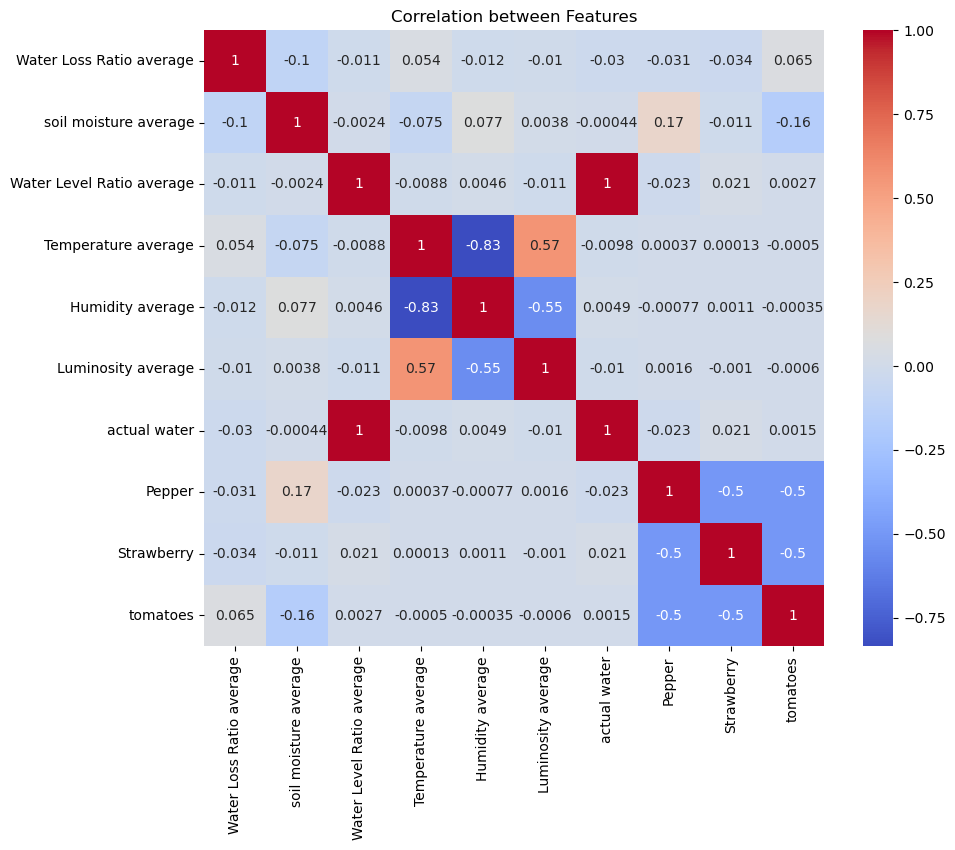

In [21]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation between features and target
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Features")
plt.show()

In [23]:
X = data.drop('actual water', axis=1)
y = data['actual water']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

# Machine Learning

In [26]:
mse_scores = []
rmse_scores=[]
mae_scores=[]
r2_scores=[]
models = []

# Decision Tree

In [27]:
DecisionTree = DecisionTreeRegressor(random_state=42)
DecisionTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
predicted_values = DecisionTree.predict(X_test)
DecisionTreemae=mean_absolute_error(y_test, predicted_values)
mae_scores.append(DecisionTreemae)
DecisionTreemse=mean_squared_error(y_test, predicted_values)
mse_scores.append(DecisionTreemse)
DecisionTreermse = np.sqrt(DecisionTreemse)
rmse_scores.append(DecisionTreermse)
DecisionTreer2 = r2_score(y_test, predicted_values)
r2_scores.append(DecisionTreer2)
models.append('Decision Tree')

In [29]:
print("MSE (Mean Square Error):", DecisionTreemse)
print("MAE (Mean Absolute Error)", DecisionTreemae)
print("(RMSE) Root Mean Squared Error:", DecisionTreermse)
print("R2 Score:", DecisionTreer2)

MSE (Mean Square Error): 1.9110069148433067e-06
MAE (Mean Absolute Error) 5.612389883567771e-05
(RMSE) Root Mean Squared Error: 0.0013823917371148116
R2 Score: 0.9999954280966533


In [30]:
sample=[['0.993088','475.332','33','18.97','72.20','1398.00','0','1','0']]
DecisionTree.predict(sample)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([3.985])

In [31]:
# Save Model as Pickel
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

# Random Forest

In [32]:
RandomForest = RandomForestRegressor(n_estimators=100, random_state=42)
RandomForest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
predicted_values = RandomForest.predict(X_test)
RandomForestmae=mean_absolute_error(y_test, predicted_values)
mae_scores.append(RandomForestmae)
RandomForestmse=mean_squared_error(y_test, predicted_values)
mse_scores.append(RandomForestmse)
RandomForestrmse = np.sqrt(RandomForestmse)
rmse_scores.append(RandomForestrmse)
RandomForestr2 = r2_score(y_test, predicted_values)
r2_scores.append(RandomForestr2)
models.append('Random Forest')

In [34]:
print("MSE (Mean Square Error):", RandomForestmse)
print("MAE (Mean Absolute Error)", RandomForestmae)
print("(RMSE) Root Mean Squared Error:", RandomForestrmse)
print("R2 Score:", RandomForestr2)

MSE (Mean Square Error): 1.6307177370465237e-06
MAE (Mean Absolute Error) 5.027990906729099e-05
(RMSE) Root Mean Squared Error: 0.0012769955900654175
R2 Score: 0.9999960986620082


In [35]:
sample=[['0.993088','475.332','33','18.97','72.20','1398.00','0','1','0']]
RandomForest.predict(sample)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([3.985])

In [36]:
# Save Model as Pickel
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForest, RF_Model_pkl)
RF_Model_pkl.close()

<AxesSubplot:title={'center':'Mean Square Error Comparison'}, xlabel='MSE', ylabel='Algorithm'>

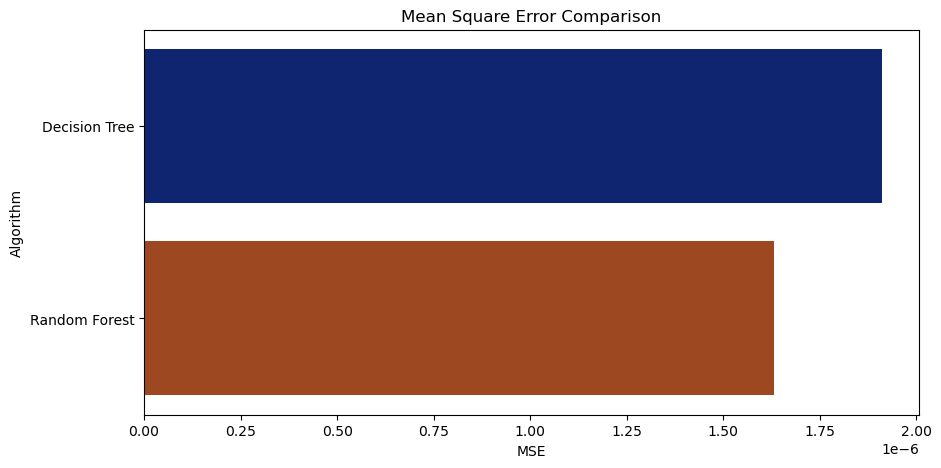

In [37]:
plt.figure(figsize=[10,5])
plt.title('Mean Square Error Comparison')
plt.xlabel('MSE')
plt.ylabel('Algorithm')
sns.barplot(x = mse_scores,y = models,palette='dark')

In [38]:
# Check Model's Accuracy
accuracy_models = dict(zip(models, mse_scores))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Decision Tree  :  1.9110069148433067e-06
Random Forest  :  1.6307177370465237e-06


<AxesSubplot:title={'center':'Mean Absolute Error Comparison'}, xlabel='MAE', ylabel='Algorithm'>

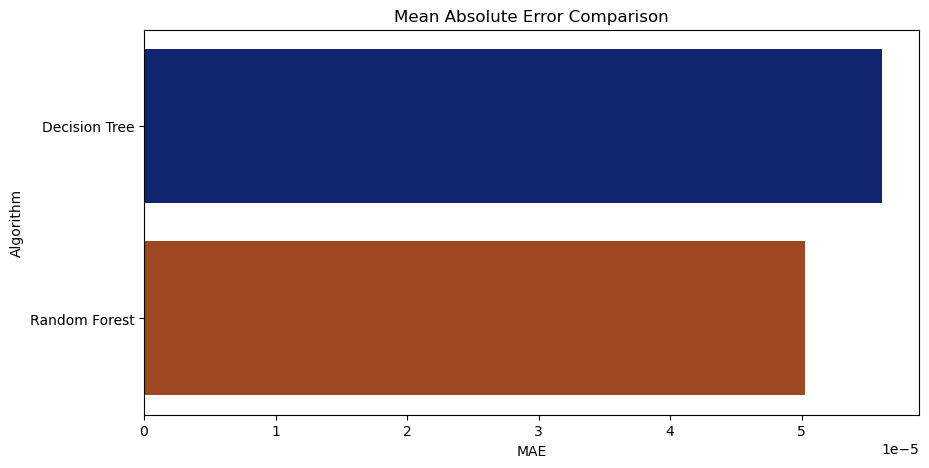

In [39]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Mean Absolute Error Comparison')
plt.xlabel('MAE')
plt.ylabel('Algorithm')
sns.barplot(x = mae_scores,y = models,palette='dark')

In [40]:
# Check Model's MAE
accuracy_models = dict(zip(models, mae_scores))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Decision Tree  :  5.612389883567771e-05
Random Forest  :  5.027990906729099e-05


<AxesSubplot:title={'center':'root mean squared error (RMSE) Comparison'}, xlabel='root mean squared error (RMSE)', ylabel='Algorithm'>

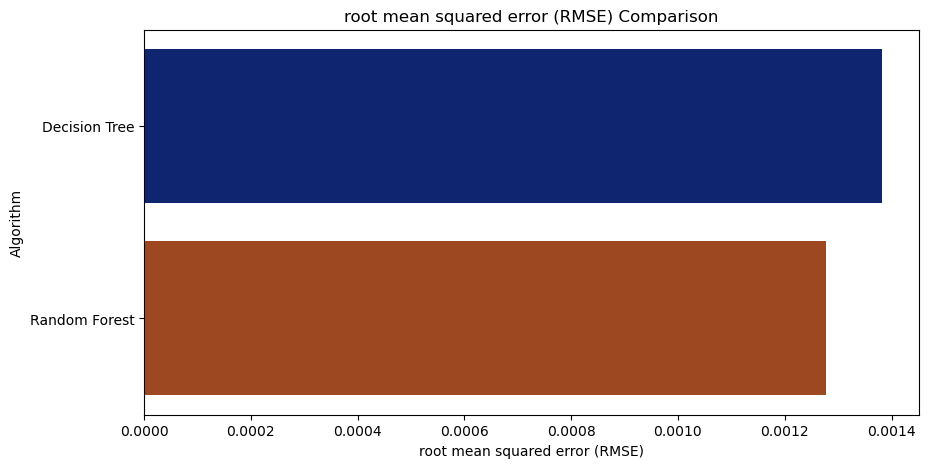

In [41]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('root mean squared error (RMSE) Comparison')
plt.xlabel('root mean squared error (RMSE)')
plt.ylabel('Algorithm')
sns.barplot(x = rmse_scores,y = models,palette='dark')

In [42]:
# Check Model's Accuracy
accuracy_models = dict(zip(models, rmse_scores))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Decision Tree  :  0.0013823917371148116
Random Forest  :  0.0012769955900654175


<AxesSubplot:title={'center':'R2 Scores'}, xlabel='r2)', ylabel='Algorithm'>

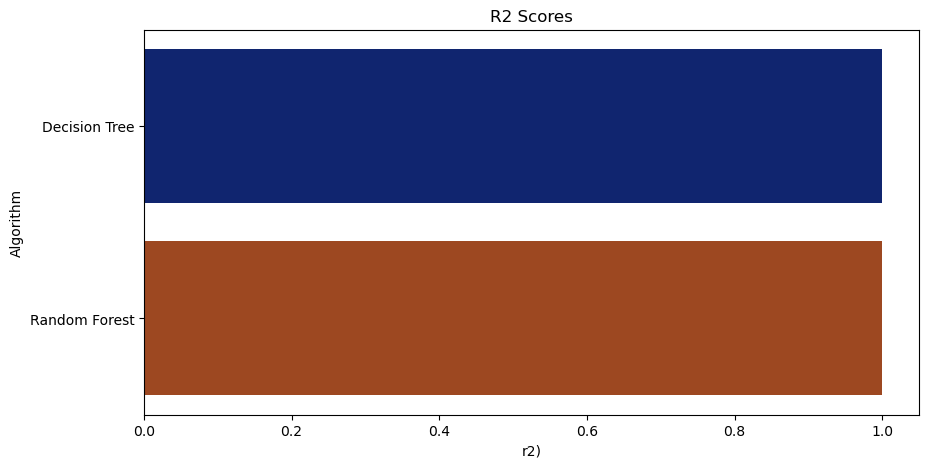

In [43]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('R2 Scores')
plt.xlabel('r2)')
plt.ylabel('Algorithm')
sns.barplot(x = r2_scores,y = models,palette='dark')

In [44]:
# Check Model's Accuracy
accuracy_models = dict(zip(models, r2_scores))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Decision Tree  :  0.9999954280966533
Random Forest  :  0.9999960986620082


# Deep Learning

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))    
model.add(Dense(1, activation='linear'))
model.add(tf.keras.layers.Dropout(0.2))


In [47]:
# Compile the neural network
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

In [48]:
from keras.callbacks import EarlyStopping

# Create an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=9)

In [49]:
history=model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test),shuffle=True,callbacks=[early_stopping])


Epoch 1/100
172/172 [==============================] - 2s 5ms/step - loss: 9401.8652 - mae: 24.2500 - mse: 9401.8652 - val_loss: 118.4942 - val_mae: 6.6769 - val_mse: 118.4942
Epoch 2/100
172/172 [==============================] - 1s 4ms/step - loss: 10.1207 - mae: 2.1223 - mse: 10.1207 - val_loss: 1.1181 - val_mae: 0.8500 - val_mse: 1.1181
Epoch 3/100
172/172 [==============================] - 1s 4ms/step - loss: 8.9894 - mae: 1.7859 - mse: 8.9894 - val_loss: 10.7575 - val_mae: 2.5196 - val_mse: 10.7575
Epoch 4/100
172/172 [==============================] - 1s 4ms/step - loss: 16.5736 - mae: 2.3133 - mse: 16.5736 - val_loss: 4.5730 - val_mae: 1.7398 - val_mse: 4.5730
Epoch 5/100
172/172 [==============================] - 1s 4ms/step - loss: 9.1143 - mae: 1.8374 - mse: 9.1143 - val_loss: 2.3236 - val_mae: 1.2192 - val_mse: 2.3236
Epoch 6/100
172/172 [==============================] - 1s 4ms/step - loss: 5.0290 - mae: 1.3902 - mse: 5.0290 - val_loss: 28.0280 - val_mae: 3.7125 - val_mse:

In [50]:
model.evaluate(X_test,y_test)

74/74 [==============================] - 0s 2ms/step - loss: 14.1611 - mae: 2.8256 - mse: 14.1611


[14.161149978637695, 2.8255889415740967, 14.161149978637695]

In [51]:
model.predict(X_test)

74/74 [==============================] - 0s 2ms/step


array([[-3.1850345],
       [ 1.9168786],
       [ 1.9604543],
       ...,
       [ 0.6580593],
       [ 1.7916089],
       [ 0.7961989]], dtype=float32)

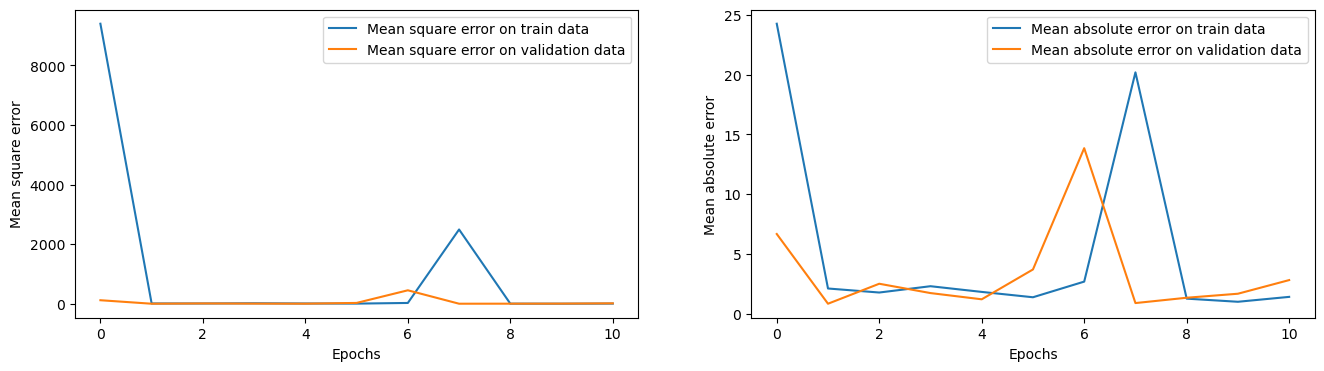

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(history.history['mse'], label='Mean square error on train data')
axes[0].plot(history.history['val_mse'], label='Mean square error on validation data')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Mean square error')
axes[0].legend()

axes[1].plot(history.history['mae'], label='Mean absolute error on train data')
axes[1].plot(history.history['val_mae'], label='Mean absolute error on validation data')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean absolute error')
axes[1].legend()
plt.show()


In [53]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
......mean_metric_wrapper_1
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-06-22 14:42:51         2345
variables.h5                                   2023-06-22 